In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [6]:
combined = [train_df, test_df]

In [7]:
train_df.shape, test_df.shape

((11504798, 12), (7669866, 11))

In [8]:
gender_count = train_df["Gender"].value_counts()
gender_count

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64

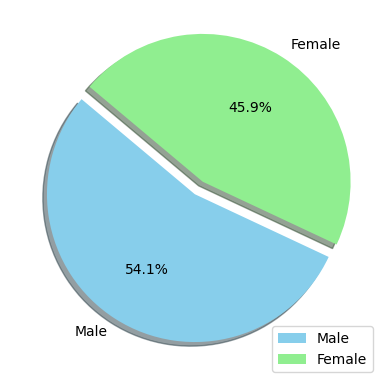

In [9]:
labels = ['Male', 'Female']
colors = ['skyblue', 'lightgreen']
explode = (0, 0.1)

plt.pie(train_df["Gender"].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.show()

In [10]:
train_df[["Gender", "Response"]].groupby("Gender").mean()

,Response
Gender,
Female,0.103297
Male,0.139688


The "Gender" feature does not highly differ in the target "Response".

In [11]:
for dataset in combined:
    dataset["Gender"] = dataset["Gender"].map({"Male" : 0, "Female" : 1})
    
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [12]:
combined = [train_df, test_df]

In [13]:
train_df["Driving_License"].value_counts()

Driving_License
1    11482041
0       22757
Name: count, dtype: int64

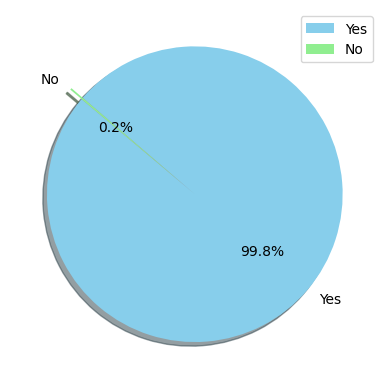

In [14]:
plt.pie(train_df["Driving_License"].value_counts(), explode=explode, labels = ['Yes', 'No'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.show()

In [15]:
train_df[["Driving_License", "Response"]].groupby("Driving_License").mean()

,Response
Driving_License,
0,0.055148
1,0.123132


## Imbalance:

The feature is highly imbalanced, with 99.8% of the instances having a driving license.
This imbalance might mean the feature doesn't provide much discriminatory power for most machine learning models because almost everyone in the dataset has a driving license.

In [16]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


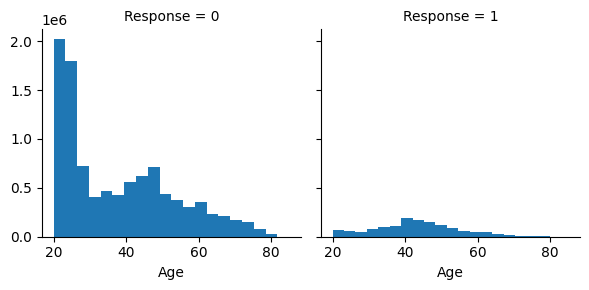

In [17]:
g = sns.FacetGrid(train_df, col="Response")
g.map(plt.hist, "Age", bins=20)

In [18]:
train_df[["Previously_Insured", "Response"]].groupby("Previously_Insured").mean()

,Response
Previously_Insured,
0,0.228493
1,0.000638


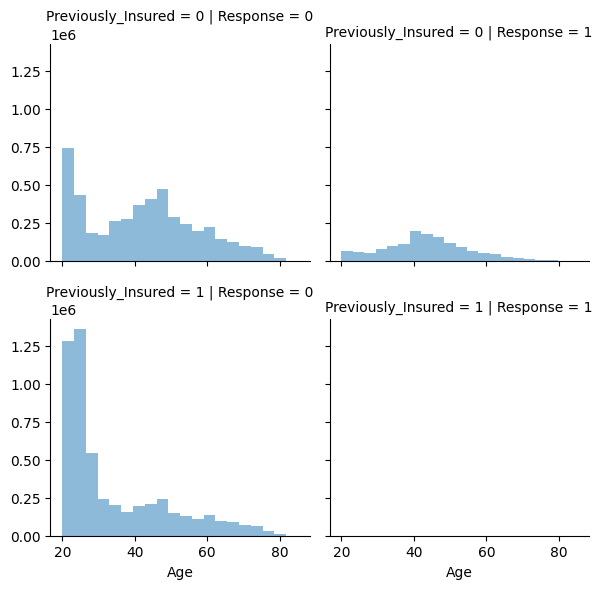

In [19]:
g = sns.FacetGrid(train_df, col="Response", row=("Previously_Insured"))
g.map(plt.hist, "Age", bins=20, alpha=.5)

In [20]:
train_df["Vehicle_Age"].unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [21]:
train_df[["Vehicle_Age", "Response"]].groupby("Vehicle_Age").mean()

,Response
Vehicle_Age,
1-2 Year,0.177725
< 1 Year,0.041404
> 2 Years,0.299049


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


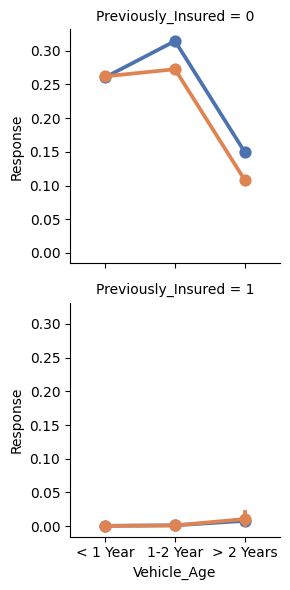

In [22]:
g = sns.FacetGrid(train_df, row="Previously_Insured")
g.map(sns.pointplot, "Vehicle_Age","Response", "Gender", palette='deep')

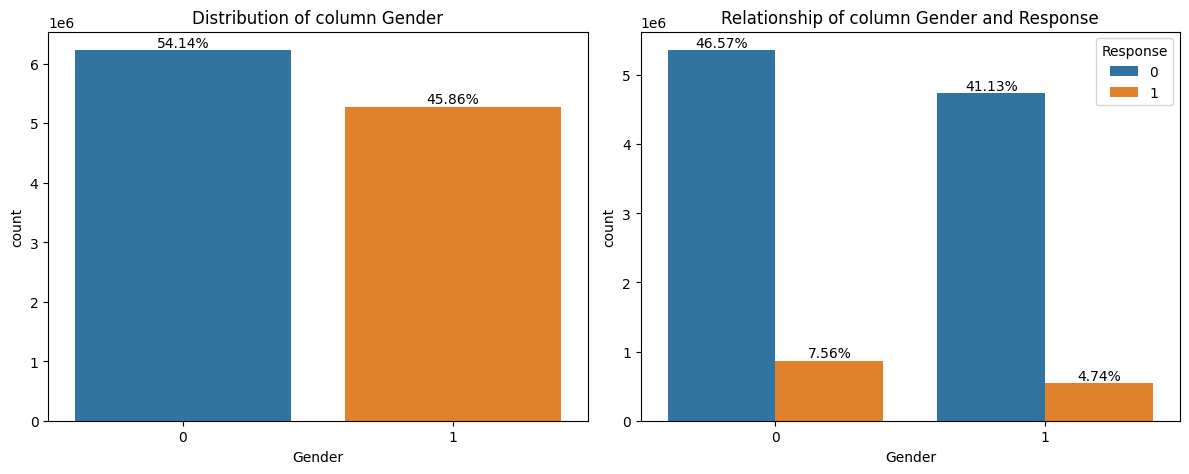

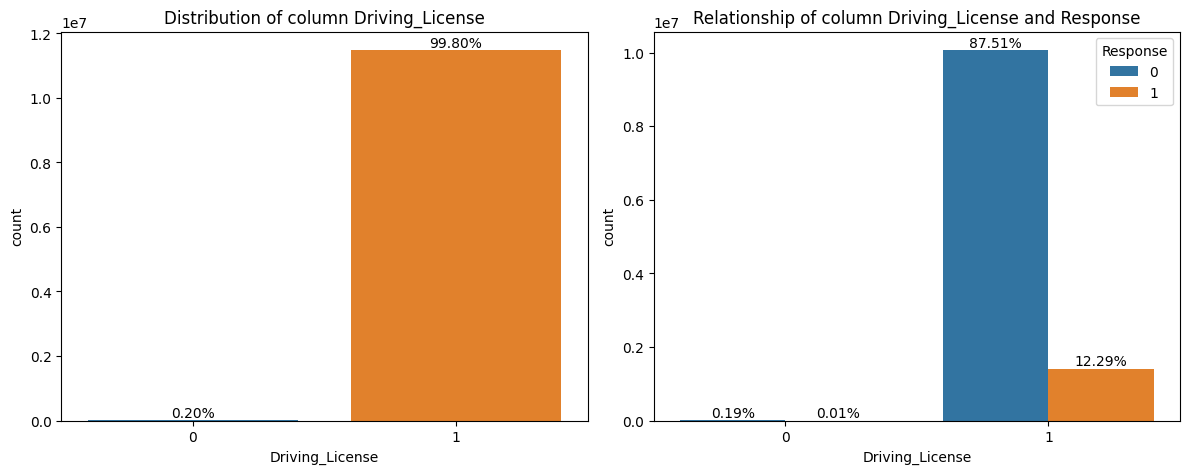

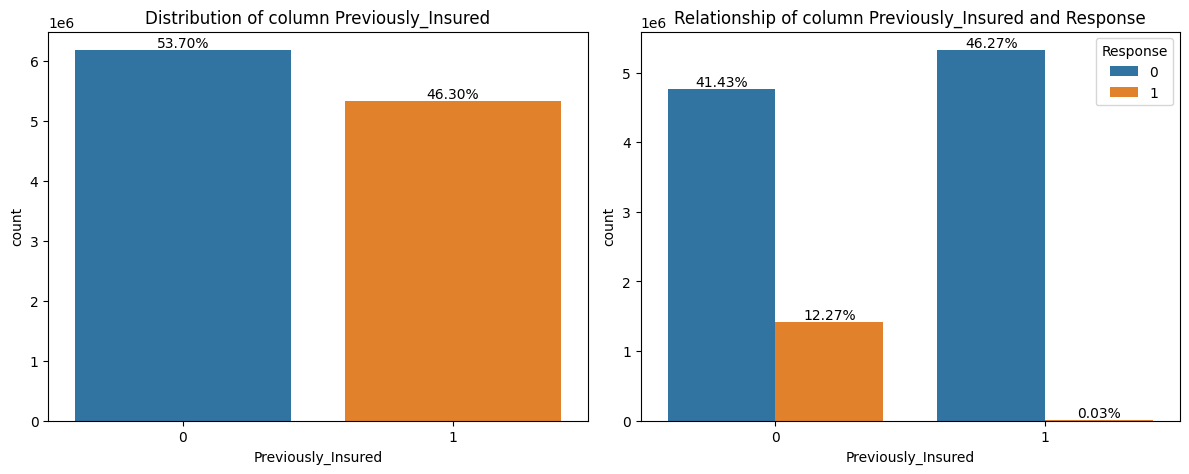

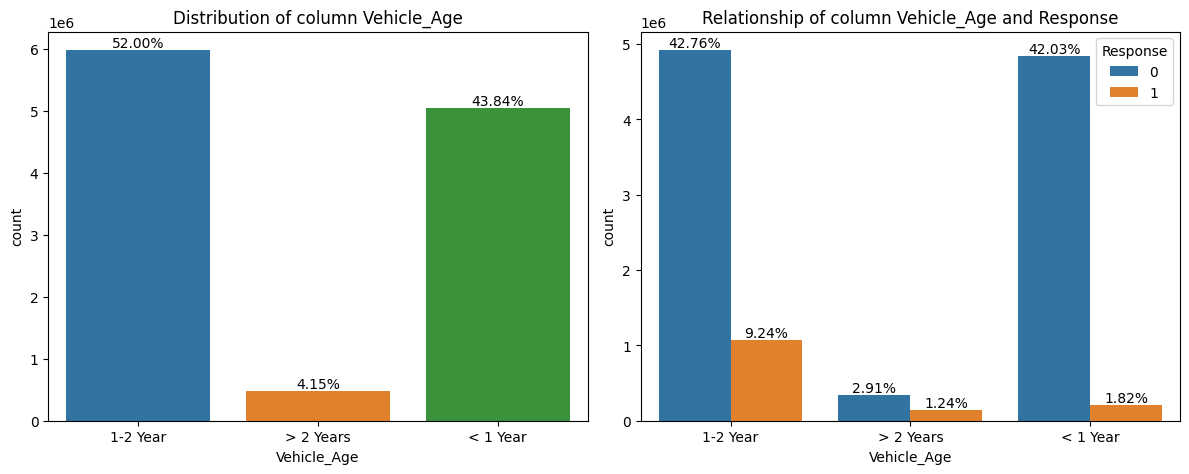

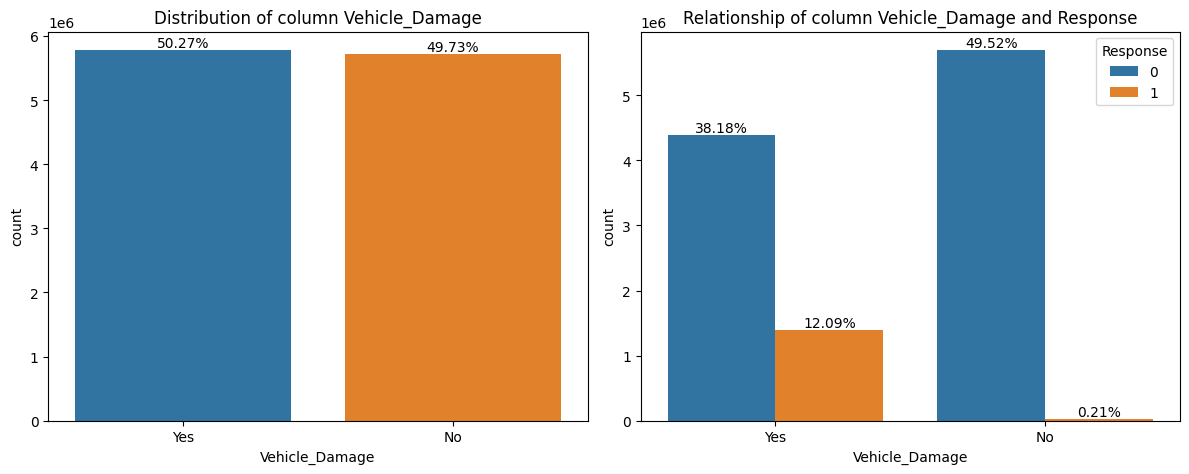

In [24]:
less = []
for i in train_df.columns[1:]:
    if train_df[i].nunique() < 10:
        less.append(i)
for i in less[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plotting the first countplot
    sns.countplot(x=i, data=train_df, ax=ax[0])
    ax[0].set_title(f'Distribution of column {i}')
    
    # Adding percentages on top of the bars for the first countplot
    total = len(train_df)
    for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30 
        ax[0].annotate(percentage, (x, y), ha='center', va='bottom')

    # Plotting the second countplot with hue='Response'
    sns.countplot(x=i, data=train_df, hue='Response', ax=ax[1])
    ax[1].set_title(f'Relationship of column {i} and Response')
    
    # Adding percentages on top of the bars for the second countplot
    for p in ax[1].patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax[1].patches if p.get_x() == p.get_x()])  # Total height for this x value
        percentage = f'{100 * height / total:.2f}%' if total > 0 else '0%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30
        ax[1].annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [34]:
for dataset in combined:
    dataset["Vehicle_Age"] = dataset["Vehicle_Age"].map({"< 1 Year" : 0, "1-2 Year" : 1, "> 2 Years": 2})
    
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1,0,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,2,0,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,0,1,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1,0,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1,1,31951.0,152.0,294,0


<Axes: >

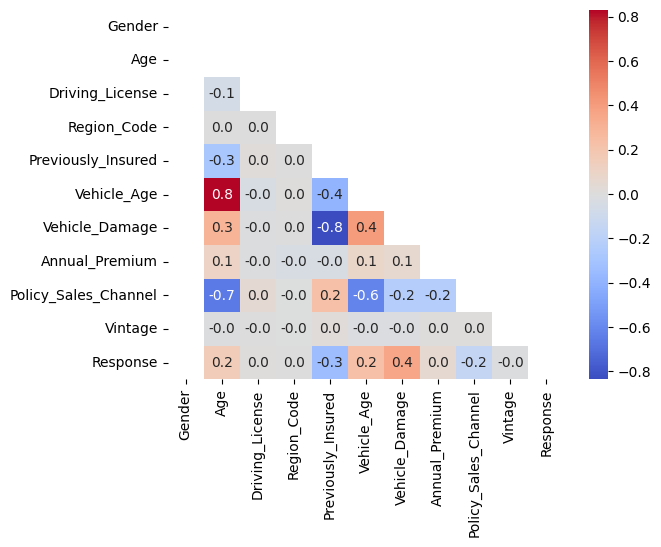

In [25]:
new = train_df.copy().drop('id',axis=1)
new['Gender'] = new['Gender'].map({'Male':0,'Female':1})
new['Vehicle_Age'] = new['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1,'> 2 Years':2})
new['Vehicle_Damage'] = new['Vehicle_Damage'].map({'Yes':1,'No':0})

sns.heatmap(new.corr(method='spearman'),
           mask = np.triu(np.ones_like(new.corr(method='spearman'),dtype=bool)),
           annot=True,cmap='coolwarm',fmt='.1f')

In [26]:
train_df["Vehicle_Damage"].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
for dataset in combined:
    dataset["Vehicle_Damage"] = dataset["Vehicle_Damage"].map({"Yes" : 0, "No" : 1})
    
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1-2 Year,0,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,> 2 Years,0,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,< 1 Year,1,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1-2 Year,0,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1-2 Year,1,31951.0,152.0,294,0


# MODEL TRAINING :

In [36]:
X = train_df.drop(["Response", "id"], axis=1)
y = train_df["Response"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# SCALE DATA FOR MODEL TRAINING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

test_df_ = test_df.drop("id", axis=1)
test_df_result = scaler.transform(test_df_)

# Logistic Regression

In [39]:
# TRAIN MODEL
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# ACCURACY
y_pred = lr.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

# ROC AUC SCORE
y_pred_proba = lr.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("ACCURACY : ", acc, "ROC AUC SCORE", auc_roc)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ACCURACY :  0.8766566998122522 ROC AUC SCORE 0.5021251744019186


In [40]:
models = pd.DataFrame({
    "Models": ["Logistic Regression"],
    "Accuracy" : [acc],
    "ROC AUC SCORE" : [auc_roc]
})
models

,Models,Accuracy,ROC AUC SCORE
0,Logistic Regression,0.876657,0.502125


# RANDOM FOREST

In [41]:
# TRAIN MODEL
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)



RandomForestClassifier()

In [42]:
import joblib

# Save the model to a .pkl file
joblib.dump(RF, 'model.pkl')


['model.pkl']

In [43]:
# ACCURACY
y_pred = RF.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

In [44]:
acc

0.864058914540018

In [45]:
# ROC AUC SCORE
y_pred_proba = RF.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("ACCURACY : ", acc, "ROC AUC SCORE", auc_roc)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ACCURACY :  0.864058914540018 ROC AUC SCORE 0.7692755125708355


In [46]:
models.loc[len(models)] = ["RF", acc, auc_roc]
models

,Models,Accuracy,ROC AUC SCORE
0,Logistic Regression,0.876657,0.502125
1,RF,0.864059,0.769276


In [47]:
pred = RF.predict_proba(test_df_result)[:,1]

In [48]:
submission = pd.DataFrame({
    "id" : test_df["id"],
    "Response" : pred
})

submission.to_csv('submission_01.csv', index=False)